In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
from google.colab import userdata
import os

# Retrieve the secret value from Colab Secrets
ngrok_key = userdata.get('NGROK_AUTH_TOKEN') # Use the name you defined in Step 1
hyperbolic_key = userdata.get('HYPERBOLIC_API_KEY')
# Set it as an environment variable
os.environ["HYPERBOLIC_API_KEY"] = hyperbolic_key
os.environ["NGROK_AUTH_TOKEN"] = ngrok_key



In [3]:
!pip install -q pyngrok
# there is no ngrok directory

In [4]:
!ls ~/.config

Google	matplotlib  uv


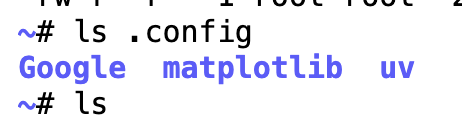

In [5]:
# .config/ngrok created when you add token
!ngrok config add-authtoken {os.environ['NGROK_AUTH_TOKEN']}

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [6]:
!ls ~/.config

Google	matplotlib  ngrok  uv


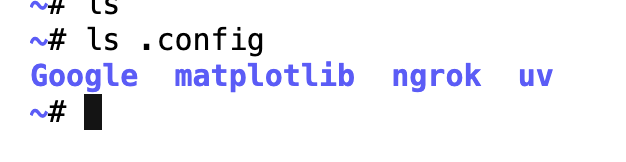

In [7]:
import os

# Get the token from the environment variable
# If you are using Colab Secrets, ensure you've set NGROK_AUTH_TOKEN there first!
token = os.environ.get('NGROK_AUTH_TOKEN')

if not token:
    raise ValueError("NGROK_AUTH_TOKEN environment variable not found!")

# Use an f-string (notice the 'f' before the triple quotes)
config = f"""
version: "2"
region: us
authtoken: {token}

tunnels:
  ollama:
    proto: http
    addr: 11434
    host_header: localhost:11434
    domain: labrador-fair-trivially.ngrok-free.app
"""

# Ensure the directory exists
os.makedirs('/root/.config/ngrok', exist_ok=True)

with open('/root/.config/ngrok/ngrok.yml', 'w') as f:
    f.write(config)

print("✅ ngrok.yml updated with environment variable.")

✅ ngrok.yml updated with environment variable.


```
ngrok.yml
~/.config/ngrok/ngrok.yml
!ngrok start --all
!curl https://labrador-fair-trivially.ngrok-free.app/api/generate -d '{ \
  "model": "qwen2.5:1.5b", \
  "prompt": "Write a short poem about a cat in space.", \
  "stream": false \
}'
```

In [9]:
# for running in colab cell.
%%bash
set -e
apt-get install zstd
# Install ollama
curl -fsSL https://ollama.com/install.sh | sh

# Show version
ollama --version

# Start persistent server in background
# this doesnt stay up in anotehr cell?
# not reliable in colab but need it to download models
nohup ollama serve > /tmp/ollama.log 2>&1 &

# Wait for server
sleep 2

# Pull model (downloads if missing)
ollama pull qwen3-vl

# Test API locally
curl http://127.0.0.1:11434/api/chat -d '{
  "model": "qwen3-vl",
  "messages": [{"role":"user","content":"Give me a 2-sentence summary of PPO."}],
  "stream": true
}'

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  zstd
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 603 kB of archives.
After this operation, 1,695 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 zstd amd64 1.4.8+dfsg-3build1 [603 kB]
Fetched 603 kB in 1s (556 kB/s)
Selecting previously unselected package zstd.
(Reading database ... 121852 files and directories currently installed.)
Preparing to unpack .../zstd_1.4.8+dfsg-3build1_amd64.deb ...
Unpacking zstd (1.4.8+dfsg-3build1) ...
Setting up zstd (1.4.8+dfsg-3build1) ...
Processing triggers for man-db (2.10.2-1) ...
{"model":"qwen3-vl","created_at":"2026-02-23T20:27:04.654931161Z","message":{"role":"assistant","content":"","thinking":"Okay"},"done":false}
{"model":"qwen3-vl","created_at":"2026-02-23T20:27:04.691391429Z","message":{"role":"assistant","content":"","thinking":",

>>> Installing ollama to /usr/local
>>> Downloading ollama-linux-amd64.tar.zst
######################################################################## 100.0%
>>> Creating ollama user...
>>> Adding ollama user to video group...
>>> Adding current user to ollama group...
>>> Creating ollama systemd service...
>>> The Ollama API is now available at 127.0.0.1:11434.
>>> Install complete. Run "ollama" from the command line.
pulling manifest ⠋ pulling manifest ⠙ pulling manifest ⠹ pulling manifest ⠸ pulling manifest ⠼ pulling manifest ⠴ pulling manifest ⠦ pulling manifest ⠧ pulling manifest ⠏ pulling manifest ⠏ pulling manifest ⠋ pulling manifest 
pulling ed12a4674d72:   0% ▕                  ▏ 2.2 MB/6.1 GB                  pulling manifest 
pulling ed12a4674d72:   1% ▕                  ▏  49 MB/6.1 GB                  pulling manifest 
pulling ed12a4674d72:   2% ▕                  ▏  98 MB/6.1 GB                  pulling manifest 
pulling ed12a4674d72:   2% ▕                  ▏ 126 MB/6.1

In [10]:
# can we start grok before installing and starting ollama? No because we customzied ngrok.yml for ollama
!ngrok start --all

Traceback (most recent call last):
  File "/usr/lib/python3.12/subprocess.py", line 1264, in wait
    return self._wait(timeout=timeout)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/subprocess.py", line 2053, in _wait
    (pid, sts) = self._try_wait(0)
                 ^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.12/subprocess.py", line 2011, in _try_wait
    (pid, sts) = os.waitpid(self.pid, wait_flags)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/bin/ngrok", line 8, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/pyngrok/ngrok.py", line 634, in main
    run(sys.argv[1:])
  File "/usr/local/lib/python3.12/dist-packages/pyngrok/ngrok.py", line 622, in run
    process.run_process(pyngrok_config.ngrok_path, args)
  File "/usr/local/lib/python3.12/dist-packages/pyngrok/pro

In [14]:
!ollama list

Error: could not connect to ollama server, run 'ollama serve' to start it


In [12]:
# Kill old ngrok
# where is the grok start all command? This is better? does start all use the config file?
!pkill -f ngrok || true

# Start ngrok in background with explicit inspect port
# this is a mistake it doesnt use the config file and starts
# a tunnel with a random assigned string.
# !nohup ngrok http 11434 \
#     --log=stdout \
#     --log-level=info \
#     > /tmp/ngrok.log 2>&1 &

!nohup ngrok start ollama \
    --config=/root/.config/ngrok/ngrok.yml \
    --log=stdout \
    --log-level=info \
    > /tmp/ngrok.log 2>&1 &

# Give it time to start
!sleep 5

# Verify ngrok process
!ps -ef | grep -i '[n]grok'

# Verify inspect API
!curl -s http://127.0.0.1:4040/api/tunnels | python3 -m json.tool

# If still nothing, print logs
!tail -n 50 /tmp/ngrok.log

^C
root        2988       1  2 20:30 ?        00:00:00 /usr/bin/python3 /usr/local/bin/ngrok start ollama --config=/root/.config/ngrok/ngrok.yml --log=stdout --log-level=info
root        2990    2988  3 20:30 ?        00:00:00 /root/.config/ngrok/ngrok start ollama --config=/root/.config/ngrok/ngrok.yml --log=stdout --log-level=info
{
    "tunnels": [
        {
            "name": "ollama",
            "ID": "3375f31d0cdfc5cb92806b6663555ee9",
            "uri": "/api/tunnels/ollama",
            "public_url": "https://labrador-fair-trivially.ngrok-free.app",
            "proto": "https",
            "config": {
                "addr": "http://localhost:11434",
                "inspect": true
            },
            "metrics": {
                "conns": {
                    "count": 0,
                    "gauge": 0,
                    "rate1": 0,
                    "rate5": 0,
                    "rate15": 0,
                    "p50": 0,
                    "p90": 0,
          

In [19]:
%%bash
set -e
# replace above cell bc this tests for log file
# 1. Kill any zombie ngrok processes
pkill -f ngrok || true

# 2. Ensure the log file exists and is writable
touch /tmp/ngrok.log
chmod 666 /tmp/ngrok.log

# 3. Start ngrok with an absolute path
# We'll use 'start ollama' to use your config
nohup /usr/local/bin/ngrok start ollama \
    --config=/root/.config/ngrok/ngrok.yml \
    --log=stdout \
    > /tmp/ngrok.log 2>&1 &

# 4. Wait for it...
sleep 5

# 5. Check if the file exists now
if [ -f /tmp/ngrok.log ]; then
    echo "--- NGROK LOG OUTPUT ---"
    cat /tmp/ngrok.log
else
    echo "❌ Log file still not found. Check if ngrok is installed via: which ngrok"
fi

--- NGROK LOG OUTPUT ---
t=2026-02-23T20:36:25+0000 lvl=info msg="open config file" path=/root/.config/ngrok/ngrok.yml err=nil
t=2026-02-23T20:36:25+0000 lvl=info msg="FIPS 140 mode" enabled=false
t=2026-02-23T20:36:25+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040 allow_hosts=[]
t=2026-02-23T20:36:25+0000 lvl=info msg="client session established" obj=tunnels.session
t=2026-02-23T20:36:25+0000 lvl=info msg="tunnel session started" obj=tunnels.session
t=2026-02-23T20:36:25+0000 lvl=info msg="started tunnel" obj=tunnels name=ollama addr=http://localhost:11434 url=https://labrador-fair-trivially.ngrok-free.app


In [20]:
!tail -n 50 /tmp/ngrok.log

t=2026-02-23T20:36:25+0000 lvl=info msg="open config file" path=/root/.config/ngrok/ngrok.yml err=nil
t=2026-02-23T20:36:25+0000 lvl=info msg="FIPS 140 mode" enabled=false
t=2026-02-23T20:36:25+0000 lvl=info msg="starting web service" obj=web addr=127.0.0.1:4040 allow_hosts=[]
t=2026-02-23T20:36:25+0000 lvl=info msg="client session established" obj=tunnels.session
t=2026-02-23T20:36:25+0000 lvl=info msg="tunnel session started" obj=tunnels.session
t=2026-02-23T20:36:25+0000 lvl=info msg="started tunnel" obj=tunnels name=ollama addr=http://localhost:11434 url=https://labrador-fair-trivially.ngrok-free.app


In [21]:
%%bash
set -e
curl -sS http://127.0.0.1:4040/api/tunnels | jq .

{
  "tunnels": [
    {
      "name": "ollama",
      "ID": "8b3f54745a440a1b983dffcc11b175e7",
      "uri": "/api/tunnels/ollama",
      "public_url": "https://labrador-fair-trivially.ngrok-free.app",
      "proto": "https",
      "config": {
        "addr": "http://localhost:11434",
        "inspect": true
      },
      "metrics": {
        "conns": {
          "count": 0,
          "gauge": 0,
          "rate1": 0,
          "rate5": 0,
          "rate15": 0,
          "p50": 0,
          "p90": 0,
          "p95": 0,
          "p99": 0
        },
        "http": {
          "count": 0,
          "rate1": 0,
          "rate5": 0,
          "rate15": 0,
          "p50": 0,
          "p90": 0,
          "p95": 0,
          "p99": 0
        }
      }
    }
  ],
  "uri": "/api/tunnels"
}


In [22]:
!curl http://127.0.0.1:11434/api/version

{"version":"0.17.0"}

In [23]:
import requests

# Replace with your actual ngrok URL
NGROK_URL = "https://labrador-fair-trivially.ngrok-free.app"

try:
    response = requests.get(f"{NGROK_URL}/api/tags")
    if response.status_code == 200:
        print("✅ Connection Successful!")
        print("Models available:", response.json())
    else:
        print(f"❌ Connection failed with status code: {response.status_code}")
except Exception as e:
    print(f"❌ Error: {e}")

✅ Connection Successful!
Models available: {'models': [{'name': 'qwen3-vl:latest', 'model': 'qwen3-vl:latest', 'modified_at': '2026-02-23T20:24:37.033156188Z', 'size': 6140415879, 'digest': '901cae73216286ea8c5aba8b46d307ff7188f737285ec500c795a12f05225d28', 'details': {'parent_model': '', 'format': 'gguf', 'family': 'qwen3vl', 'families': ['qwen3vl'], 'parameter_size': '8.8B', 'quantization_level': 'Q4_K_M'}}]}


In [24]:
!pip install ollama #there are 2, ollama server and ollama client. This is ollama client
import ollama

client = ollama.Client(host='https://labrador-fair-trivially.ngrok-free.app')

stream = client.chat(
    model='qwen3-vl',
    messages=[{'role': 'user', 'content': 'Count from 1 to 20 slowly.'}],
    stream=True,
)

print("Assistant: ", end="")
for chunk in stream:
    print(chunk['message']['content'], end='', flush=True)

Assistant: 1... (pause)  
2... (pause)  
3... (pause)  
4... (pause)  
5... (pause)  
6... (pause)  
7... (pause)  
8... (pause)  
9... (pause)  
10... (pause)  
11... (pause)  
12... (pause)  
13... (pause)  
14... (pause)  
15... (pause)  
16... (pause)  
17... (pause)  
18... (pause)  
19... (pause)  
20... (pause)  

There we go! ✨ Counted slowly, one by one. Let me know if you'd like another round or a different rhythm! 😊

In [17]:
!ollama list

NAME               ID              SIZE      MODIFIED       
qwen3-vl:latest    901cae732162    6.1 GB    10 minutes ago    


In [15]:
# converting to python colab cli version
# the cell is running the brower gym python server http.server
import os
import subprocess
import time
import requests

# 1. Set host to allow ngrok access
os.environ['OLLAMA_HOST'] = '0.0.0.0:11434'

# 2. Start Ollama as a background process
# Using Popen is generally more robust than threading for CLI daemons
print("Starting Ollama server...")
with open("/tmp/ollama.log", "w") as f:
    process = subprocess.Popen(["ollama", "serve"], stdout=f, stderr=f)

# 3. Wait for the server to be ready
for i in range(10):
    try:
        response = requests.get("http://localhost:11434/api/tags")
        if response.status_code == 200:
            print("✅ Ollama is up and running!")
            break
    except:
        time.sleep(2)
else:
    print("❌ Ollama failed to start. Check /tmp/ollama.log")

# 4. Pull the specific Vision model
print("Ensuring Qwen VL is pulled...")
subprocess.run(["ollama", "pull", "qwen2.5-vl:3b"])

Starting Ollama server...
✅ Ollama is up and running!
Ensuring Qwen VL is pulled...


CompletedProcess(args=['ollama', 'pull', 'qwen2.5-vl:3b'], returncode=1)

In [25]:
%cd /content/BrowserGym/miniwob-plusplus/miniwob/html
#!nohup python -m http.server 8000
#!nohup python3 -m http.server 8000 > /dev/null 2>&1 &
!nohup python3 -m http.server 8000 > server.log 2>&1 &

/content/BrowserGym/miniwob-plusplus/miniwob/html


In [26]:
!tail %cd /content/BrowserGym/miniwob-plusplus/miniwob/html/server.log

In [27]:
%%bash
set -e
# doesnt work from here, make sure to run this in colab terminal
export MINIWOB_URL="http://localhost:8000/miniwob/"

In [29]:
import requests

# This asks the local Ollama server about the models currently in memory
response = requests.get("http://localhost:11434/api/ps")
print(response.json())

{'models': [{'name': 'qwen3-vl:latest', 'model': 'qwen3-vl:latest', 'size': 7593457152, 'digest': '901cae73216286ea8c5aba8b46d307ff7188f737285ec500c795a12f05225d28', 'details': {'parent_model': '', 'format': 'gguf', 'family': 'qwen3vl', 'families': ['qwen3vl'], 'parameter_size': '8.8B', 'quantization_level': 'Q4_K_M'}, 'expires_at': '2026-02-24T01:55:07.26106327Z', 'size_vram': 7593457152, 'context_length': 4096}]}
